<a href="https://colab.research.google.com/github/lindseyhuppin/Neur265Work/blob/main/homework/coding_homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #3

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Make a *Code Cell* that imports <code>numpy</code> as <code>np</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, and <code>scipy.stats</code> as <code>stats</code>.

3. Make a *Code Cell* that imports your <code>v_rest_sst.csv</code> and <code>v_rest_pvalb.csv</code> variables as <code>numpy</code> arrays called <code>v_rest_sst</code> and <code>v_rest_pvalb</code> respectively.

4. Make a *Code Cell* that does the following:
  
  a. Finds the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.
  
  b. Performs a t-test to test the null hypothesis that the means of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> come from different distributions.

  c. Plots a histogram of <code>v_rest_sst</code> in one subplot, and a histogram of <code>v_rest_pvalb</code> in another subplot if the p-value of the t-test is > 0.05. You can make two subplots using the syntax <code>fig, ax = plt.subplots(1,1)</code>. You should use an <code>if</code> statement to accomplish this.

  d. Labels the y-axis and x-axis of your histograms (recall that <code>ax.ylabel</code> and <code>ax.xlabel</code> are the methods that let you accomplish this).

5. Make a *Code Cell* that defines a function called <code>vrestHist()</code>. This function should execute the code in step 4 when called.

6. Make a *Code Cell* that calls <code>vrestHist()</code>.

7. Make a *Code Cell* that does the following:

    a. Loops through each column of <code>v_rest_sst</code> and <code>v_rest_pvalb</code> and makes a scatter plot with <code>v_rest_sst</code> on the x-axis and <code>v_rest_pvalb</code> on the y-axis.

    b. Each iteration of your loop should plot a different point on the scatter plot. At the end of your loop, you should have only one scatter plot with number of data points equal to the length of <code>v_rest_sst</code> and <code>v_rest_pvalb</code>.

    c. Your loop should plot a <font color = 'red'>red</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are greater than -60, a <font color = 'green'>green</font> dot if values in <code>v_rest_sst</code> are greater than -60, but values in <code>v_rest_pvalb</code> are less than -60, a <font color = 'blue'>blue</font> dot if *both* values in <code>v_rest_sst</code> and <code>v_rest_pvalb</code> are less than -60, and a <font color = 'purple'>purple</font> dot if values in <code>v_rest_sst</code> are less than -60, but values in <code>v_rest_pvalb</code> are more than -60.

    d. Labels your y-axis and your x-axis (this code should be outside of your loop).

8. Make a *Code Cell* that defines a function called <code>vrestScatter()</code>. This function should execute the code in step 7 when called.

9. Save a copy of this notebook to your GitHub repo with the title "coding_homework_3.ipynb".

####Lindsey Huppin
*Intro to Neural Data Analysis*

**3/1/24**

In [44]:
#2 importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [45]:
#3 importing the datasets
v_rest_sst = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/v_rest_sst.csv')
v_rest_pvalb = np.loadtxt('https://raw.githubusercontent.com/lindseyhuppin/Neur265Work/main/v_rest_pvalb.csv')

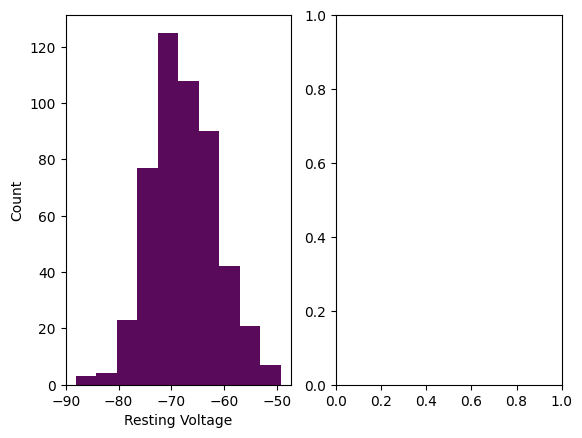

In [46]:
#4 Finding the means
mean_sst = np.mean(v_rest_sst)
mean_pvalb = np.mean(v_rest_pvalb)

#t test comparing the mean
statistic, p_value = stats.ttest_ind(v_rest_sst,v_rest_pvalb)

#plotting histograms of data with labeled axises
fig, ax = plt.subplots(1,2)
ax[0].hist(v_rest_sst,color = '#5a0a5a')
ax[0].set_xlabel('Resting Voltage')
ax[0].set_ylabel('Count')
if p_value>.05:
  #Because the pvalue is much less than .05, this code is not run
  ax[1].hist(v_rest_pvalb,color = '#aaaaaa')
  ax[1].xlabel('Resting Voltage')
  ax[1].ylabel('Count')

In [47]:
#5 creating a function that plots histograms
def vrestHist():
  #Finding the means
  mean_sst = np.mean(v_rest_sst)
  mean_pvalb = np.mean(v_rest_pvalb)

  #t test comparing the mean
  statistic, p_value = stats.ttest_ind(v_rest_sst,v_rest_pvalb)

  #plotting histograms of data with labeled axises
  fig, ax = plt.subplots(1,2)
  ax[0].hist(v_rest_sst,color = '#5a0a5a')
  ax[0].set_xlabel('Resting Voltage')
  ax[0].set_ylabel('Count')
  if p_value>.05:
    #Because the pvalue is much less than .05, this code is not run
    ax[1].hist(v_rest_pvalb,color = '#aaaaaa')
    ax[1].xlabel('Resting Voltage')
    ax[1].ylabel('Count')

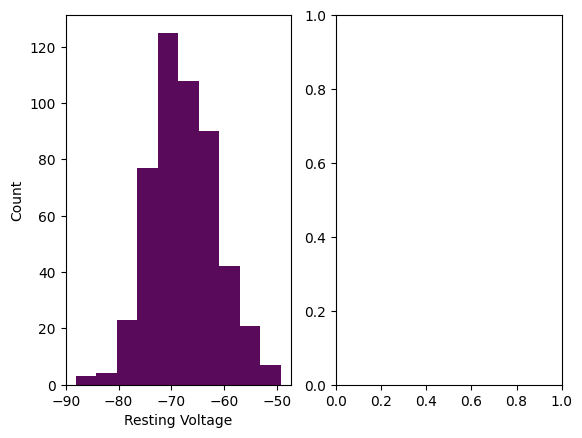

In [48]:
#6 calling vrestHist()
vrestHist()

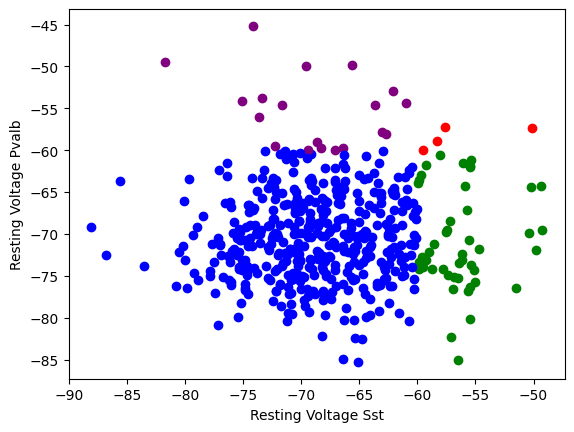

In [49]:
#7 loop through sst and pvalb and create a scatterplot
for i in range(len(v_rest_sst)):
  if v_rest_sst[i]>-60 and v_rest_pvalb[i]>-60:
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i],color = 'r')
  elif v_rest_sst[i]>-60:
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = 'g')
  elif v_rest_pvalb[i]>-60:
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = 'purple')
  else:
    plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = 'b')
plt.xlabel('Resting Voltage Sst')
plt.ylabel('Resting Voltage Pvalb')
plt.show()

In [51]:
#8 creates a scatter plot with sst and pvalb data
def vrestScatter():
  for i in range(len(v_rest_sst)):
    if v_rest_sst[i]>-60 and v_rest_pvalb[i]>-60:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i],color = 'r')
    elif v_rest_sst[i]>-60:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = 'g')
    elif v_rest_pvalb[i]>-60:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = 'purple')
    else:
      plt.scatter(v_rest_sst[i],v_rest_pvalb[i], color = 'b')
  plt.xlabel('Resting Voltage Sst')
  plt.ylabel('Resting Voltage Pvalb')
  plt.show()